In [ ]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [ ]:
!pip install torchdiffeq==0.2.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from datasets import load_dataset
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
import seaborn as sns
import pandas as pd

sys.path.insert(1, '/content/drive/MyDrive/Colab Notebooks/ECE228/project') # change this to the path to the models and utils folder
from models import *
from utils import *

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
ds = load_dataset("dragonintelligence/CIFAKE-image-dataset")
ds_shuffled = ds.shuffle(seed=42)

README.md:   0%|          | 0.00/488 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/42.1M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/20000 [00:00<?, ? examples/s]

torch.Size([3, 224, 224])


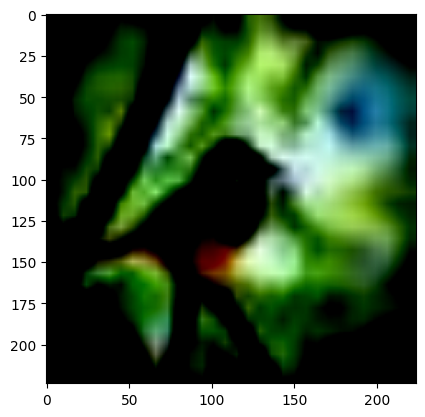

torch.Size([3, 224, 224])


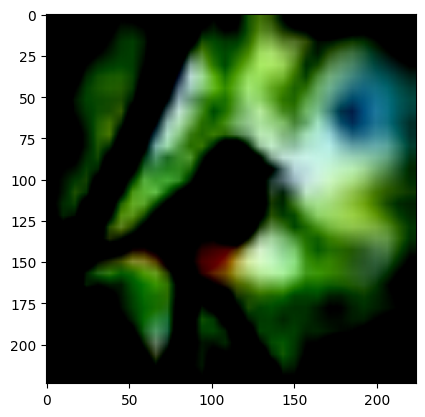

In [ ]:
# ignore this cell

a = CIFAKEDataset_ViT_scaled(ds_shuffled['train'].select(range(10)))
print(a[0]['image'].shape)

show_tenosr_image(a[0]['image'])

b = CIFAKEDataset_ViT_scaled_Blur(ds_shuffled['train'].select(range(10)))
print(b[0]['image'].shape)

show_tenosr_image(b[0]['image'])

In [ ]:
# ignore this cell

import kagglehub

# Download latest version
path = kagglehub.dataset_download("xhlulu/140k-real-and-fake-faces")

print("Path to dataset files:", path)

100%|██████████| 3.75G/3.75G [02:54<00:00, 23.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2


In [ ]:
# ignore this cell

root_dir = path+'/real_vs_fake/real-vs-fake'


train_df = create_dataframe(root_dir)
val_df = create_dataframe(root_dir, split='valid')

# create dataset
train_dataset = FaceDataset(train_df, root_dir, transform=None)
val_dataset = FaceDataset(val_df, root_dir, transform=None)

The following cells are used to create the model and the path to the saved model. Modify the path accordingly. The path to the model is save_dir+save_model_name.

In [ ]:
model = CNN_base()

save_dir = '/content/drive/MyDrive/Colab Notebooks/ECE228/project/saved_models_data/'
save_model_name='CNN_base_data.pt'

In [ ]:
model = CNN_adversarial()

save_dir = '/content/drive/MyDrive/Colab Notebooks/ECE228/project/saved_models/'
save_model_name='CNN_adversarial.pt'

In [ ]:
model = Densenet121_custom()

save_dir = '/content/drive/MyDrive/Colab Notebooks/ECE228/project/saved_models_data/'
save_model_name='Densenet121_custom_data.pt'

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 197MB/s]


In [ ]:
model = Densenet201_custom()

save_dir = '/content/drive/MyDrive/Colab Notebooks/ECE228/project/saved_models_data/'
save_model_name='Densenet201_custom_data.pt'

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 106MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may 

In [ ]:
model = Densenet121_custom_adversarial()

save_dir = '/content/drive/MyDrive/Colab Notebooks/ECE228/project/saved_models/'
save_model_name='Densenet121_custom_adversarial.pt'

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 58.7MB/s]


In [ ]:
model = AugmentedNeuralODE_conv(device='cuda',num_layers=1,aug_channels=10)

save_dir = '/content/drive/MyDrive/Colab Notebooks/ECE228/project/saved_models_data/'
save_model_name='AugmentedNeuralODE_conv_data.pt'

In [ ]:
model = ViT_pretrained()

save_dir = '/content/drive/MyDrive/Colab Notebooks/ECE228/project/saved_models_data/'
save_model_name='ViT_pretrained_CIFAKE_data.pt'

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
model = ViT_pretrained_adversarial()

save_dir = '/content/drive/MyDrive/Colab Notebooks/ECE228/project/saved_models/'
save_model_name='ViT_pretrained_adversarial.pt'

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
print(model)

Densenet121_custom_adversarial(
  (densenet): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96,

The following cells are used to train the model.

In [ ]:


train_model(model=model,dataset_train=ds_shuffled['train'],\
      dataset_test=ds_shuffled['test'],\
      dataset_train_class=CIFAKEDataset,\
      dataset_test_class=CIFAKEDataset,\
      save_dir=save_dir,save_model_name=save_model_name,\
      train_num=50000,test_num=10000,batch_size=32,\
      device='cuda',epochs=3,learning_rate=2e-5,\
      adversarial=True,criterion=negative_log_likelihood)

length of training set: 50000
length of testing set: 10000


 33%|███▎      | 1/3 [05:49<11:38, 349.05s/it]

epoch:0, current train loss:-0.659,	                       current test loss:-0.789,	                       best accuracy:0.873


 67%|██████▋   | 2/3 [11:36<05:48, 348.35s/it]

epoch:1, current train loss:-1.108,	                       current test loss:-0.861,	                       best accuracy:0.891


100%|██████████| 3/3 [17:28<00:00, 349.57s/it]

epoch:2, current train loss:-1.272,	                       current test loss:-0.904,	                       best accuracy:0.898


In [ ]:
train_model(model=model,dataset_train=ds_shuffled['train'],\
      dataset_test=ds_shuffled['test'],\
      dataset_train_class=CIFAKEDataset_ViT_scaled,\
      dataset_test_class=CIFAKEDataset_ViT_scaled,\
      save_dir=save_dir,save_model_name=save_model_name,\
      train_num=50000,test_num=10000,\
      device='cuda',epochs=3,learning_rate=2e-5,\
      adversarial=True)

length of training set: 50000
length of testing set: 10000


  0%|          | 0/3 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 92.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 86.12 MiB is free. Process 4102 has 14.65 GiB memory in use. Of the allocated memory 14.36 GiB is allocated by PyTorch, and 176.25 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:



train_model(model=model,dataset_train=train_dataset,\
      dataset_test=val_dataset,\
      dataset_train_class=None,\
      dataset_test_class=None,\
      save_dir=save_dir,save_model_name=save_model_name,\
      train_num=5000,test_num=1000,\
      device='cuda',epochs=10,learning_rate=2e-5)

length of training set: 5000
length of testing set: 1000


 10%|█         | 1/10 [03:41<33:09, 221.06s/it]

epoch:0, current train loss:0.236,	                       current test loss:0.117,	                       best accuracy:0.962


 20%|██        | 2/10 [07:23<29:35, 221.94s/it]

epoch:1, current train loss:0.079,	                       current test loss:0.082,	                       best accuracy:0.966


 30%|███       | 3/10 [11:07<26:00, 222.99s/it]

epoch:2, current train loss:0.058,	                       current test loss:0.053,	                       best accuracy:0.983


 40%|████      | 4/10 [14:47<22:11, 221.84s/it]

epoch:3, current train loss:0.044,	                       current test loss:0.054,	                       best accuracy:0.983


 50%|█████     | 5/10 [18:28<18:26, 221.22s/it]

epoch:4, current train loss:0.045,	                       current test loss:0.039,	                       best accuracy:0.986


 60%|██████    | 6/10 [22:14<14:52, 223.08s/it]

epoch:5, current train loss:0.040,	                       current test loss:0.044,	                       best accuracy:0.989


 70%|███████   | 7/10 [25:54<11:05, 221.92s/it]

epoch:6, current train loss:0.033,	                       current test loss:0.052,	                       best accuracy:0.989


 80%|████████  | 8/10 [29:33<07:22, 221.18s/it]

epoch:7, current train loss:0.032,	                       current test loss:0.034,	                       best accuracy:0.989


 90%|█████████ | 9/10 [33:12<03:40, 220.41s/it]

epoch:8, current train loss:0.029,	                       current test loss:0.031,	                       best accuracy:0.989


100%|██████████| 10/10 [36:51<00:00, 221.17s/it]

epoch:9, current train loss:0.039,	                       current test loss:0.039,	                       best accuracy:0.989


load the saved model

In [ ]:
model.load_state_dict(torch.load(save_dir+save_model_name))

num_total_trainable_para = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'number of total trainable parameters: {num_total_trainable_para}')

number of total trainable parameters: 86569658


Test the model on CIFAKE and blurred CIFAKE.

In [ ]:

for dataset_class in [CIFAKEDataset_Blur,CIFAKEDataset]:
  dataset_test = dataset_class(ds_shuffled['test'].select(range(10000)))
  testloader = DataLoader(dataset_test, batch_size=32, shuffle=False)

  test_loss, test_acc, _ = test_model(model=model, testloader=testloader, device='cuda', criterion=negative_log_likelihood)
  print(f'test dataset: {dataset_test.__class__.__name__}, test loss: {test_loss}, test accuracy: {test_acc}')

ValueError: Input image size (32*32) doesn't match model (224*224).

If the model is ViT, use this cell.

In [ ]:
for dataset_class in [CIFAKEDataset_ViT_scaled_Blur,CIFAKEDataset_ViT_scaled]:
  dataset_test = dataset_class(ds_shuffled['test'].select(range(10000)))
  testloader = DataLoader(dataset_test, batch_size=32, shuffle=False)

  test_loss, test_acc, _ = test_model(model=model, testloader=testloader, device='cuda', criterion=negative_log_likelihood)
  print(f'test dataset: {dataset_test.__class__.__name__}, test loss: {test_loss}, test accuracy: {test_acc}')

test dataset: CIFAKEDataset_ViT_scaled_Blur, test loss: 13.005508490073414, test accuracy: 0.8746006389776357
test dataset: CIFAKEDataset_ViT_scaled, test loss: -2.855559278981754, test accuracy: 0.9678514376996805


If the model has 2 output values, use this cell to test it.

In [ ]:
dataset_test = CIFAKEDataset_ViT_scaled_Blur(ds_shuffled['test'].select(range(10000)))
testloader = DataLoader(dataset_test, batch_size=32, shuffle=False)

test_loss, test_acc, var = test_model(model=model, testloader=testloader, device='cuda', criterion=negative_log_likelihood)
print(f'test dataset: {dataset_test.__class__.__name__}, test loss: {test_loss}, test accuracy: {test_acc}')

test dataset: CIFAKEDataset_ViT_scaled_Blur, test loss: 8.826741312734615, test accuracy: 0.8764976038338658


The following cells are just for plotting.

In [ ]:

def plot_var(var,model_name):
  var_np = var.to('cpu').detach().numpy()[1:]
  var_np_df = pd.DataFrame(var_np,columns=['var_'+model_name])

  sns.set_style("darkgrid")
  #sns.kdeplot(data=var_np_df,bw_adjust=0.2)
  sns.histplot(data=var_np_df,stat='count')



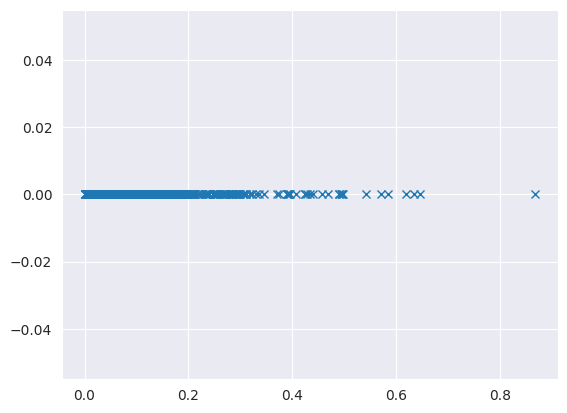

var_ViT_Blur    float32
dtype: object
   var_ViT_Blur
0      0.023786
1      0.000129
2      0.000111
3      0.001112
4      0.000225


<Axes: ylabel='Count'>

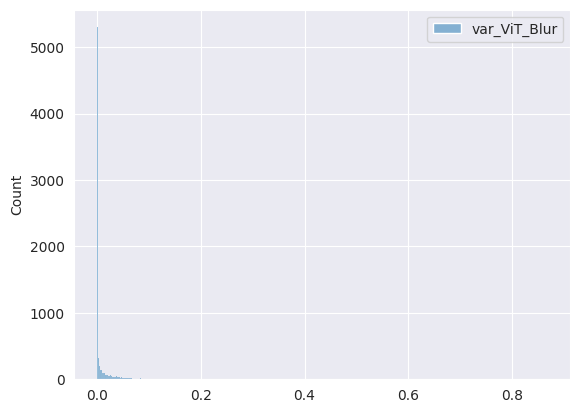

In [ ]:
var_np = var.to('cpu').detach().numpy()[1:]

plt.plot(var_np, np.zeros_like(var_np) + 0, 'x')
plt.show()

var_np_df = pd.DataFrame(var_np,columns=['var_'+'ViT_Blur'])
print(var_np_df.dtypes)
print(var_np_df.head())
sns.set_style("darkgrid")

sns.histplot(data=var_np_df,stat='count')
#plt.ylim([0,3000])

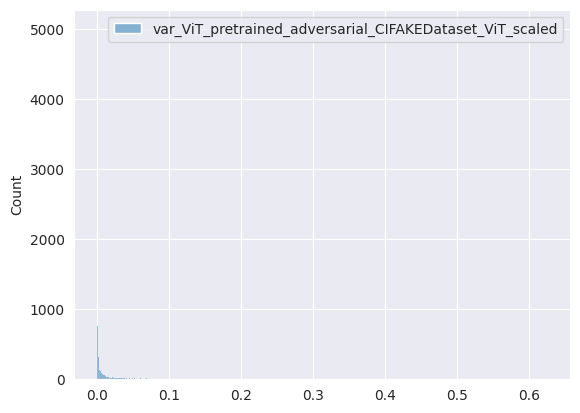

In [ ]:
plot_var(var,save_model_name[:-3]+'_'+dataset_test.__class__.__name__)

In [ ]:
test_loss_CNN_base = [0.25708530311243605, 0.2007330864096602, 0.1841097907921948, 0.1802634776721652, 0.17395869859705526, 0.17205248903423642, 0.17131648780986333, 0.17088763663372675, 0.17082932891960914, 0.17069385127542308]
test_loss_densenet_custom = [0.1760156749964903, 0.13245537356375314, 0.12161536356761528, 0.0980961666064569, 0.11132450792164848, 0.10325923476728222, 0.10695059463744774, 0.11611154416487507, 0.1172828639378792, 0.11841569685579141]
test_loss_NODE = [0.3744776136102006, 0.3475738434841077, 0.3044736564825899, 0.29221692862221227, 0.3000844275465789, 0.2806218541182649, 0.2804111998540144, 0.2790146165857681, 0.2788036857216884, 0.2783354413680756]
test_loss_ViT_pretrained = [0.04821464587833471, 0.03745303899057174, 0.04185065920824321, 0.0450978479488081, 0.047517967563713674, 0.0485933658947149, 0.049311185657237855, 0.049789856220173345, 0.050108902701180874, 0.05027596719125662]

train_loss_CNN_base = [0.3499655343082114, 0.22075149902307636, 0.18254350576375777, 0.1641428238960723, 0.15520865142688642, 0.1505975888938341, 0.1481249876015284, 0.146798781309365, 0.14617938045185877, 0.14593197263107513]
train_loss_densenet_custom = [0.24956785950640495, 0.15978117499164451, 0.11590110341245481, 0.07993792437621161, 0.0497190753615152, 0.027413014811828614, 0.01779969791625224, 0.012402320437679117, 0.009696103190110984, 0.00776517316753586]
train_loss_NODE = [0.4919976333891514, 0.3402731976187618, 0.3026325890766987, 0.28049602174102994, 0.2685069159312044, 0.26306458026103996, 0.2599641563024036, 0.25851908329009093, 0.2577166651552561, 0.257390007247966]
train_loss_ViT_pretrained = [0.09624441880929281, 0.01718356832024514, 0.00381042927279464, 0.001223219568320761, 0.0006267069288010611, 0.00046910930329555, 0.0004056284040921116, 0.0003666822082133476, 0.000346783150591894, 0.00033376821996396834]

test_acc_CNN_base = [0.8943690095846646, 0.915435303514377, 0.9233226837060703, 0.9268170926517572, 0.9292132587859425, 0.9300119808306709, 0.9304113418530351, 0.9313099041533547, 0.9307108626198083, 0.9305111821086262]
test_acc_densenet_custom = [0.9304113418530351, 0.9496805111821086, 0.9531749201277955, 0.963158945686901, 0.9623602236421726, 0.9662539936102237, 0.9666533546325878, 0.9672523961661342, 0.966952875399361, 0.9672523961661342]
test_acc_NODE = [0.84185303514377, 0.8538338658146964, 0.8721046325878594, 0.8793929712460063, 0.871305910543131, 0.8880790734824281, 0.8843849840255591, 0.8869808306709265, 0.8852835463258786, 0.8874800319488818]
test_acc_ViT_pretrained = [0.9831807324840764, 0.9875597133757962, 0.9874601910828026, 0.9880573248407644, 0.9886544585987261, 0.9884554140127388, 0.9884554140127388, 0.9884554140127388, 0.9885549363057324, 0.9885549363057324]

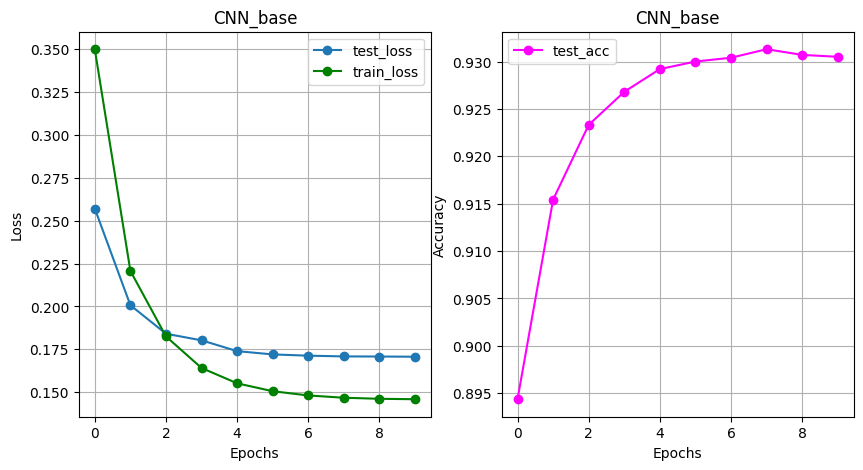

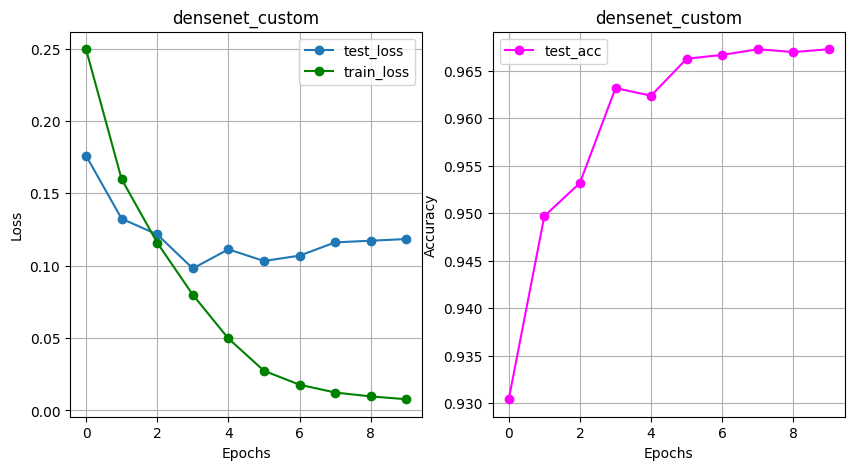

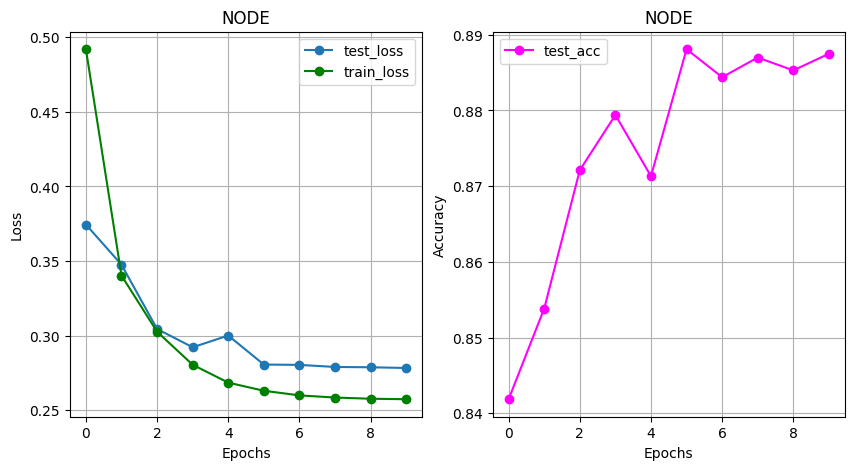

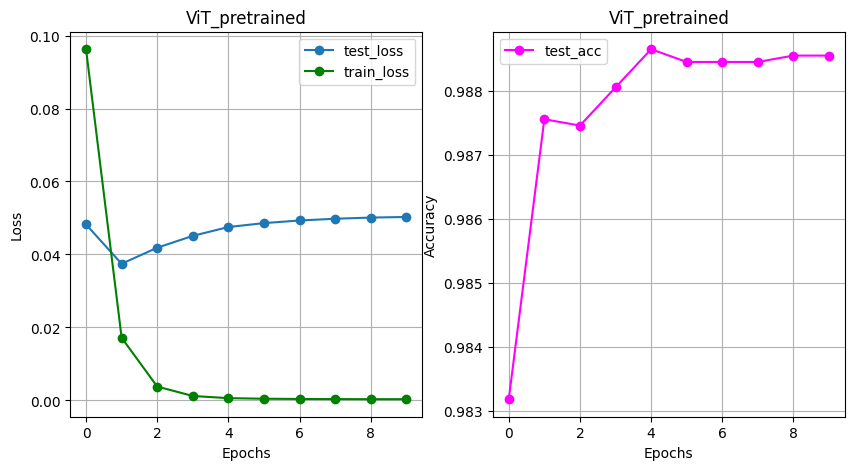

In [ ]:
plot_loss_acc(test_loss_CNN_base,train_loss_CNN_base,test_acc_CNN_base,'CNN_base')
plot_loss_acc(test_loss_densenet_custom,train_loss_densenet_custom,test_acc_densenet_custom,'densenet_custom')
plot_loss_acc(test_loss_NODE,train_loss_NODE,test_acc_NODE,'NODE')
plot_loss_acc(test_loss_ViT_pretrained,train_loss_ViT_pretrained,test_acc_ViT_pretrained,'ViT_pretrained')
#

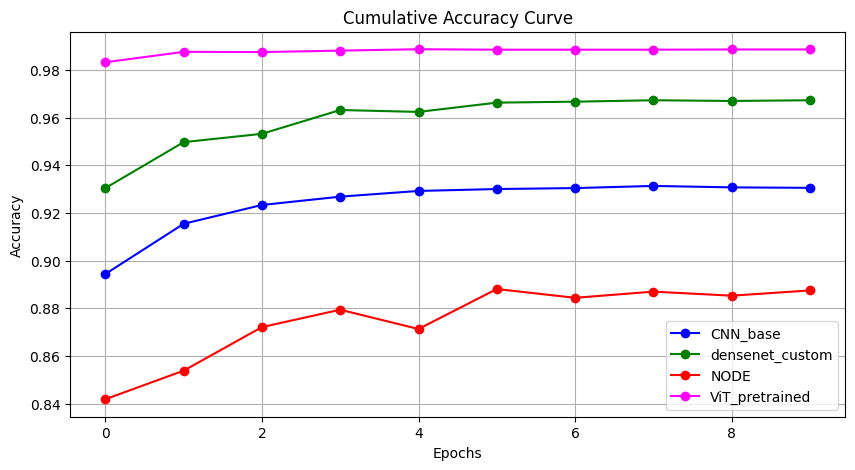

In [ ]:
# cumulative acc curve for each model
fig3,ax3 = plt.subplots(1,1,figsize=(10,5))
ax3.plot(range(10),test_acc_CNN_base,marker='o',label='CNN_base',color='blue')
ax3.plot(range(10),test_acc_densenet_custom,marker='o',label='densenet_custom',color='green')
ax3.plot(range(10),test_acc_NODE,marker='o',label='NODE',color='red')
ax3.plot(range(10),test_acc_ViT_pretrained,marker='o',label='ViT_pretrained',color='magenta')
ax3.legend()
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.grid(True)
ax3.set_title('Cumulative Accuracy Curve')
plt.show()
fig3.savefig('Cumulative_Accuracy_Curve.png')

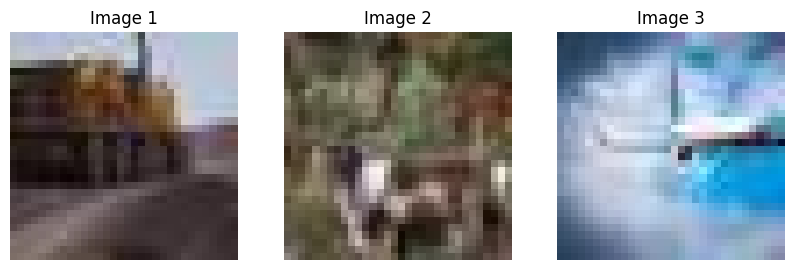

In [ ]:
import random
import matplotlib.pyplot as plt

# Select 3 random indices
random_indices = random.sample(range(len(ds_shuffled['train'])), 3)

# Create a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

dset = CIFAKEDataset(ds_shuffled['train'])
#

# Display each image
for i, idx in enumerate(random_indices):
    image = dset[idx]['image']
    tensor_image = torch.transpose(image, 0, 2)
    tensor_image = torch.transpose(tensor_image, 0,1)
    image = np.squeeze(tensor_image.numpy())
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

#plt.tight_layout()
plt.show()
fig.savefig('CIFAKE_random_images.png')